# CGAN
---

In [1]:
IMG_SHAPE = (32,32,3)
Z_DIM = 128

## 데이터 로더

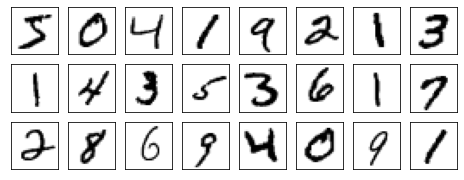

((60000, 28, 28, 1), (60000,))

In [2]:
from data_loader import *
from utils import display_sample_img
x_train, y_train, _, _ = mnist_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape

## 모델 구성

In [3]:
from model import BuildModel
builder = BuildModel(IMG_SHAPE, Z_DIM, 10)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise (InputLayer)             [(None, 128)]        0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['noise[0][0]',                  
                                                                  'condition[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 8192)         1138688     ['concatenate[0][0]']    

## 학습